<a href="https://colab.research.google.com/github/e2alvarado/Modelos-EDA-ML-NLP/blob/main/2024_Urban_Bliss_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Usa distintos gráficos o tablas para describir las variables presentes en esta base.


##Analisis Expliratorio de Datos (EDA)

Para comenzar, se carga la base de datos de excel y la transformamos usando la librería Beautifulsoup la cual sirve usualmente para extracción de datos de html pero la usamos ya que pandas y colab lo permiten en este entorno.

In [ ]:
import pandas as pd
from IPython.display import display, HTML
from bs4 import BeautifulSoup

df = pd.read_csv('/content/Urban_Bliss.csv', sep=';')

html_output = df.head().to_html(index=True)
soup = BeautifulSoup(html_output, 'html.parser')

display(HTML(str(soup.prettify())))


,City,Month,Year,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
0,New York,January,2024,70,High,35,40,6.5,100,80
1,Los Angeles,January,2024,65,Medium,40,50,6.8,90,75
2,Chicago,January,2024,60,Medium,30,55,7.0,85,70
3,London,January,2024,55,High,50,60,7.2,110,85
4,Paris,January,2024,60,High,45,65,6.9,95,80


Procedemos a encontrar caracteristicas de mi base de datos, los números de filas y columnas que posse, los nombres de las columnas, los faltantes y el tipo de dato.

In [ ]:
dimensiones = df.shape
print("Número de filas y columnas:", dimensiones)
print("")
print("Información de la base de datos: \n")
info_df = df.info()


Número de filas y columnas: (545, 10)

Información de la base de datos: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  545 non-null    object 
 1   Month                 545 non-null    object 
 2   Year                  545 non-null    int64  
 3   Decibel_Level         545 non-null    int64  
 4   Traffic_Density       545 non-null    object 
 5   Green_Space_Area      545 non-null    int64  
 6   Air_Quality_Index     545 non-null    int64  
 7   Happiness_Score       545 non-null    float64
 8   Cost_of_Living_Index  545 non-null    int64  
 9   Healthcare_Index      545 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 42.7+ KB


Imprimimos la estadística descriptiva de mi dataframe

In [ ]:
print(df.describe())


              Year  Decibel_Level  Green_Space_Area  Air_Quality_Index  \
count   545.000000     545.000000        545.000000         545.000000   
mean   2026.082569      56.779817       1085.366972          38.036697   
std       1.652363       6.856402        756.993165          36.300656   
min    2024.000000      50.000000          5.000000           5.000000   
25%    2025.000000      55.000000        385.000000          25.000000   
50%    2026.000000      55.000000       1065.000000          30.000000   
75%    2027.000000      60.000000       1745.000000          35.000000   
max    2029.000000      90.000000       2425.000000         245.000000   

       Happiness_Score  Cost_of_Living_Index  Healthcare_Index  
count       545.000000            545.000000        545.000000  
mean        -44.865505             30.458716         93.086239  
std          42.407240             21.082180         10.550034  
min        -122.900000             20.000000         35.000000  
25%     

GRaficamos las estadísicas descriptivas con graficos de violín interactivas

In [ ]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('/content/Urban_Bliss.csv', sep=';')

# GRáficos de violín
fig_violin = px.violin(df.melt(var_name='Column', value_name='Value'),
                       y='Value', box=True, points="all",
                       color='Column', title='Distribución de Estadísticas Descriptivas',
                       labels={'Value': 'Valor', 'Column': 'Columna'},
                       height=800)

fig_violin.show()


Verificamos a través de una matriz de correlación, la relación que tienen todas las variables entre sí en el conjunto de datos

<ipython-input-46-9d8a06b35050>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



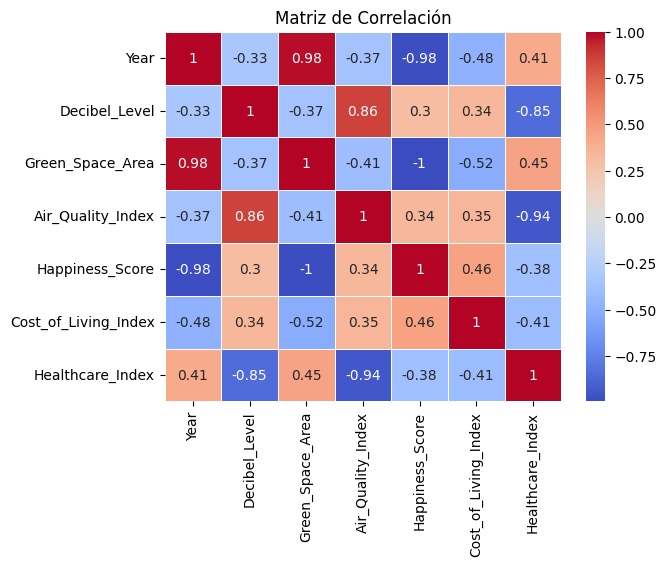

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()


La altura de cada barra indica el conteo de observaciones para cada combinación de densidad de tráfico y mes. Este tipo de gráfico es útil para visualizar la distribución y la variación de la densidad de tráfico a lo largo de los diferentes meses.

In [ ]:
import plotly.express as px

# Crear un gráfico interactivo de conteo
fig = px.bar(df, x='Traffic_Density', color='Month', title='Relación entre Traffic_Density y Month',
             labels={'Traffic_Density': 'Densidad de Tráfico', 'count': 'Conteo'})

fig.show()


Este análisis representa el nivel promedio de decibelios, índice de calidad del aire y puntaje de felicidad para cada ciudad en tu conjunto de datos. Este tipo de análisis es útil para obtener una visión general de las características promedio de las ciudades y para compararlas entre sí.

In [ ]:
group_by_city = df.groupby('City').mean()
print(group_by_city[['Decibel_Level', 'Air_Quality_Index', 'Happiness_Score']])


                 Decibel_Level  Air_Quality_Index  Happiness_Score
City                                                              
Adelaide             55.000000          45.000000         7.800000
Amberley             59.285714          34.285714       -82.271429
Amsterdam            50.000000          50.000000         7.900000
Aranga               55.000000          30.000000         1.000000
Arrowtown            55.000000          30.000000       -35.300000
...                        ...                ...              ...
Whangarei Heads      50.000000          25.000000        -7.400000
Whangaruru           55.000000          30.000000         0.000000
Whataroa             55.000000          20.000000       -22.100000
Whitianga            50.000000          25.000000         7.500000
Yangon               80.000000         215.000000         3.500000

[227 rows x 3 columns]


<ipython-input-48-4dfcc0ac83bc>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



plt.boxplot(df['Decibel_Level'])
plt.title('Diagrama de Caja para Decibel_Level')
plt.ylabel('Decibel_Level')
plt.show()


Esta gráfica representa la comparación del Nivel de Felicidad entre diferentes ciudades. Cada barra horizontal corresponde a una ciudad, y la longitud de la barra indica el nivel promedio de felicidad en esa ciudad

In [ ]:
# Supongamos que esto es el código que calcula average_happiness_by_city
group_by_city = df.groupby('City').mean()
average_happiness_by_city = group_by_city['Happiness_Score'].sort_values()

<ipython-input-49-d0b12c9739bc>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
import plotly.express as px

# Crear un gráfico de barras horizontales interactivas con colores de degradado
fig = px.bar(average_happiness_by_city.reset_index(),
             x='Happiness_Score',
             y='City',
             color='Happiness_Score',
             color_continuous_scale='blues',
             labels={'Happiness_Score': 'Happiness Score Promedio'},
             title='Comparación del Nivel de Felicidad entre Ciudades')

fig.update_layout(yaxis=dict(categoryorder='total ascending'))
fig.update_traces(marker_line_color='black', marker_line_width=1, opacity=0.8)

fig.show()


La gráfica representa la relación entre la Densidad de Tráfico, el Nivel de Felicidad y el Nivel de Decibelios en las diferentes ciudades.

-Mientras mas grande sea el punto, mas area verde
-Mientra smas oscuro el tono del color, mauor es el nivel de deibelios
-El eje Y representa los niveles de felicidad
-El eje X representa la variación de tráfico en las ciudades



In [ ]:
import plotly.express as px

fig = px.scatter(df, x='Traffic_Density', y='Happiness_Score', color='Decibel_Level', size='Green_Space_Area',
                 hover_name='City', title='Relación entre Densidad de Tráfico, Nivel de Felicidad y Decibelios',
                 labels={'Traffic_Density': 'Densidad de Tráfico', 'Happiness_Score': 'Nivel de Felicidad',
                         'Decibel_Level': 'Nivel de Decibelios', 'Green_Space_Area': 'Área de Espacio Verde'})
fig.update_layout(coloraxis_colorbar=dict(title='Decibelios'))
fig.show()


#2.¿Cuál es la correlación entre las distintas variables sobre el índice de felicidad? Realiza una regresión de MCO para verificar cuál variable tiene el mayor impacto. Comenta si te sorprende o no el resultado?

Primero se calcula la matriz de correlación

In [ ]:
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

                          Year  Decibel_Level  Green_Space_Area  \
Year                  1.000000      -0.328582          0.980819   
Decibel_Level        -0.328582       1.000000         -0.367614   
Green_Space_Area      0.980819      -0.367614          1.000000   
Air_Quality_Index    -0.366736       0.857510         -0.409295   
Happiness_Score      -0.980963       0.304475         -0.995415   
Cost_of_Living_Index -0.476539       0.341519         -0.516014   
Healthcare_Index      0.408732      -0.850148          0.454309   

                      Air_Quality_Index  Happiness_Score  \
Year                          -0.366736        -0.980963   
Decibel_Level                  0.857510         0.304475   
Green_Space_Area              -0.409295        -0.995415   
Air_Quality_Index              1.000000         0.339520   
Happiness_Score                0.339520         1.000000   
Cost_of_Living_Index           0.349828         0.459536   
Healthcare_Index              -0.943195    

luego usamos esos cálculos para crar una regresión de mínimos cuadrados (MCO)

In [ ]:
import statsmodels.api as sm

# Selecciona las variables relevantes
X = sm.add_constant(df[['Decibel_Level', 'Air_Quality_Index']])

# Variable dependiente (índice de felicidad)
y = df['Happiness_Score']

# Crea el modelo de regresión de MCO
model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        Happiness_Score   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     35.54
Date:                Sun, 03 Mar 2024   Prob (F-statistic):           3.13e-15
Time:                        05:28:22   Log-Likelihood:                -2781.5
No. Observations:                 545   AIC:                             5569.
Df Residuals:                     542   BIC:                             5582.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -75.7240     24.70

##Variables con mayor impacto

Según la regresión de míminos cuadrados Ordinarios (MCO), se observaron coeficientes asociados con las variables predictoras, por lo tanto el coeficiente mas alto corresponde a la variable "Air_Quality_Index" es decir, el indice de calidad del aire, por lo tanto es esta variable que tiene mayor impacto en el Indice de felicidad.

Realmente no me sorprende que la calidad del aire sea la variable más asociada al indice de felicidad, ya que al factores como la calidad del aire y la presencia de areas verdes son conocidos por afectar el bienestar y la felicidad de las personas. Por lo tanto, si las empresas quieren mejorar la productividad de los empleados, podría implementar algunas mejoras con respecto a estas variables y seguir conservando los espacios y la calidad del aire de las personas.

 Puedes observar que el coeficiente asociado a Air_Quality_Index tiene un valor p muy bajo (p-value < 0.05), lo que sugiere que es estadísticamente significativo y tiene un impacto positivo en la variable de respuesta Happiness_Score. En cambio, el coeficiente asociado a Decibel_Level no es significativo (p-value > 0.05), lo que sugiere que no tiene un impacto estadísticamente significativo.

#3.Revisa las diez ciudades con el puntaje más alto del índice. ¿Tienen algo en común a primera vista? Luego intenta obtener las coordenadas de cada ciudad usando: https://www.tutorialspoint.com/how-to-get-the-longitude-and-latitude-of-a-city-using-python. Para instalar corre:


##Extrayendo las coordenadas de la categoría City de mi dataframe utilizando la librería geopy para las 30 cuidades con puntaje mas alto en el índice de felicidad

In [ ]:
!pip install geopy

import pandas as pd
from geopy.geocoders import Nominatim

#función para obtener las coordenadas de una ciudad
def get_coordinates(city):
    geolocator = Nominatim(user_agent="my_geocoder")
    location = geolocator.geocode(city)
    if location:
        return location.latitude, location.longitude
    else:
        return None

df = pd.read_csv('/content/Urban_Bliss.csv', sep=';')

#seleccionar las 30 ciudades con el puntaje más alto
top_cities = df.nlargest(30, 'Happiness_Score')

# Obtener las coordenadas para cada ciudad
top_cities['Coordinates'] = top_cities['City'].apply(get_coordinates)

print(top_cities[['City', 'Happiness_Score', 'Coordinates']])


                City  Happiness_Score                 Coordinates
80            Napier              8.6   (-39.4902099, 176.917839)
33              Oslo              8.5    (59.9133301, 10.7389701)
79            Nelson              8.5   (37.8078463, -85.4741595)
84  Palmerston North              8.5   (-40.356317, 175.6112388)
34          Helsinki              8.4    (60.1674881, 24.9427473)
78        Queenstown              8.4      (-45.0321923, 168.661)
83           Rotorua              8.4   (-38.1381493, 176.252922)
88          Gisborne              8.4   (-38.661326, 178.0206487)
31        Copenhagen              8.3    (55.6867243, 12.5700724)
77           Dunedin              8.3  (-45.8740984, 170.5035755)
82          Tauranga              8.3   (-37.6859006, 176.167505)
87            Napier              8.3   (-39.4902099, 176.917839)
92           Tokoroa              8.3  (-38.2168677, 175.8705389)
29            Vienna              8.2    (48.2083537, 16.3725042)
76      Ch

#GRaficando las coordenadas extraidas en el punto anterior en un mapa utilizando la librería folium

In [ ]:
!pip install folium

import folium

#Creando marcadores con la funcion
def add_marker(map, city, happiness_score, coordinates):
    folium.Marker(
        location=coordinates,
        popup=f"{city}<br>Happiness Score: {happiness_score}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(map)

# Crea un mapa con las coordenadas anteriores
map_center = [top_cities.iloc[0]['Coordinates'][0], top_cities.iloc[0]['Coordinates'][1]]
mymap = folium.Map(location=map_center, zoom_start=5)

for _, row in top_cities.iterrows():
    add_marker(mymap, row['City'], row['Happiness_Score'], row['Coordinates'])

mymap
